# 6 Supervised Learning with categorical output

![image](https://miro.medium.com/max/775/1*Qn4eJPhkvrEQ62CtmydLZw.png)

- Typical Classification problem with 2, 3, 4 (or more) outputs.
- Most of the time the output consists of binary (male/female, spam/nospam,yes/no) 
- Sometime, there are more than binary output: dog/cat/mouse, red/green/yellow.

In this category, we gonna use 2 existing dataset from [sklearn](https://scikit-learn.org/stable/datasets.html):
- [Breast Cancer Wisconsine](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-wisconsin-diagnostic-dataset) data for Binary output
- [Iris plant](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset) data for multiple (3) output.


## 6.1 Logistic Regression for binary output

- Logistic regression is another technique borrowed by machine learning from the field of statistics. It is the go-to method for binary classification problems (problems with two class values).
- Typical binary classification: True/False, Yes/No, Pass/Fail, Spam/No Spam, Male/Female
- Unlike linear regression, the prediction for the output is transformed using a non-linear function called the logistic function.
- The standard logistic function has formulation:

![image](https://user-images.githubusercontent.com/43855029/114233181-f7dcbb80-994a-11eb-9c89-58d7802d6b49.png)

![image](https://user-images.githubusercontent.com/43855029/114233189-fb704280-994a-11eb-9019-8355f5337b37.png)
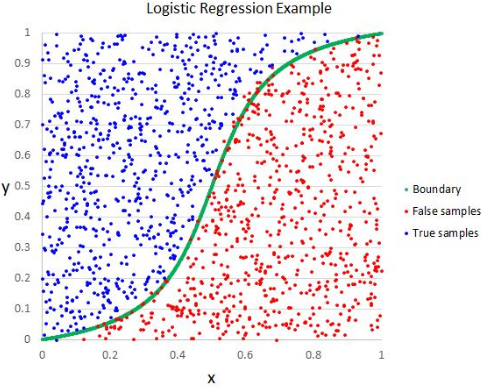


In this example, we load a sample dataset called [Breast Cancer Wisconsine](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-wisconsin-diagnostic-dataset).

### Load Breast Cancer Wisconsine data

In [1]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target
print("There are", X.shape[1], " Predictors: ", data.feature_names)
print("The output has 2 values: ", data.target_names)
print("Total size of data is ", X.shape[0], " rows")


There are 30  Predictors:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
The output has 2 values:  ['malignant' 'benign']
Total size of data is  569  rows


We can see that there are 30 input data representing the shape and size of 569 tumours.
Base on that, the tumour can be considered _malignant_ or _benign_ (0 or 1 as in number)

### Partitioning Data to train/test:

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=123)


### Train model using Logistic Regression
For simplicity, we use all predictors for the regression:


In [3]:
from sklearn.linear_model import LogisticRegression
model_LogReg = LogisticRegression(solver='newton-cg').fit(X_train, y_train)

There are more solver in LogisticRegression:

solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’

Click [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for more information

### Evaluate model output:


In [4]:
y_pred = model_LogReg.predict(X_test)

from sklearn import metrics
print("The accuracy score is %1.3f" % metrics.accuracy_score(y_test,y_pred))

The accuracy score is 0.974


### Compute AUC-ROC and plot curve


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.994


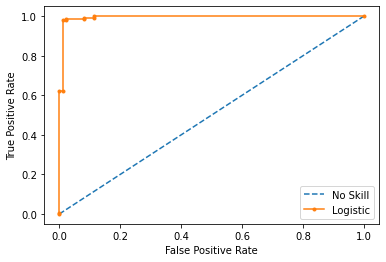

In [5]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

lr_probs = model_LogReg.predict_proba(X_test)
# generate a no skill prediction (majority class)
ns_probs = np.zeros(len(y_test))

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs[:,1])
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs[:,1])
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


An alternative way to plot AUC-ROC curve, using additional toolbox ["scikit-plot"](https://scikit-plot.readthedocs.io/en/stable/)


In [ ]:
#!pip install scikit-plot

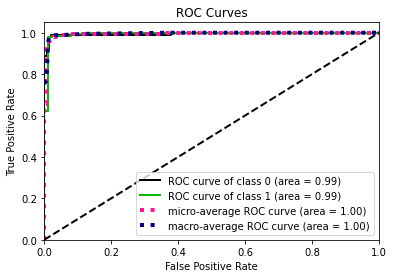

In [6]:
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, lr_probs)
plt.show()

## 6.2 Classification problem with more than 3 outputs
Here we use [Iris plant](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset) data for multiple (3) output.
### Import data


In [7]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target

print("There are", X.shape[1], " Predictors: ", data.feature_names)
print("The output has 3 values: ", data.target_names)
print("Total size of data is ", X.shape[0], " rows")

There are 4  Predictors:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
The output has 3 values:  ['setosa' 'versicolor' 'virginica']
Total size of data is  150  rows



- We can see that there are 4 input data representing the petal/sepal width and length of 3 different kind of iris flowers.
- Base on that, the iris plants can be classified as 'setosa', 'versicolor', 'virginica'.

### Partitioning Data to train/test:

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=123)


### Train model using Linear Discriminant Analysis (LDA):

For simplicity, we use all predictors for the regression:


In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model_LDA = LinearDiscriminantAnalysis().fit(X_train,y_train)

In [10]:
print("The accuracy score is %1.3f" % model_LDA.score(X_test,y_test))

The accuracy score is 0.983


In [11]:
y_pred = model_LDA.predict(X_test)

### Other algorithms

There are many other algorithms that work well for both classification and regression data such as Decision Tree, RandomForest, Bagging/Boosting. Very similar to chapter 5, the following model should be loaded:

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [14]:
model_GBC = GradientBoostingClassifier().fit(X_train,y_train)
model_GBC.score(X_test,y_test)

0.9333333333333333

In [15]:
model_RF = RandomForestClassifier().fit(X_train,y_train)
model_RF.score(X_test,y_test)

0.9666666666666667

#### Exercise: Use random forest to predict the iris flower data

# 7 Principal Component Analysis

- Handy with large data
- Where many variables correlate with one another, they will all contribute strongly to the same principal component
- Each principal component sums up a certain percentage of the total variation in the dataset
- More Principal Components, more summarization of the original data sets

## 7.1 PCA formulation
- For example: we have 3 data sets: X, Y, Z
- We need to compute the covariance matrix **M** for the 3 data set:

![image](https://user-images.githubusercontent.com/43855029/114459677-d67c0980-9bae-11eb-85b2-758a98f0cd29.png)

in which, the covariance value between 2 data sets can be computed as:

![image](https://user-images.githubusercontent.com/43855029/114459740-ea277000-9bae-11eb-9259-8ef1b233c0fa.png)


For the Covariance matrix M, we will find m eigenvectors and m eigenvalues that:

- Eigenvector with the largest eigenvalue forms the first principal component of the data set … and so on …*



<details><summary>Click here for sample of eigenvector and eigenvalues</summary>

Prove that for a matrix M = np.array([[3,2],[3,-2]])
   There is an eigenvalue 4, corresponding to eigenvector [2,1]
</details>

## 7.2 Implementation
Here we gonna use the breast cancer Wisconsine data set:



In [16]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import pandas as pd 

data = load_breast_cancer()

# Predictors/Input:
X = pd.DataFrame(data.data,columns=data.feature_names)

# Predictand/output:
y = data.target


In [17]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Split data into training/testing:

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.6,random_state=123)

X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

#### Compute PCA using scikit learn

In [19]:
from sklearn.decomposition import PCA
pca = PCA()
PCs = pca.fit_transform(X_train_scaled)
PCs.shape

(341, 30)

#### Explained Variance

The explained variance tells you how much information (variance) can be attributed to each of the principal components.



In [20]:
print(pca.explained_variance_ratio_)
print("The first 4 components represent %1.3f" % pca.explained_variance_ratio_[0:4].sum(), " total variance")

[4.39933355e-01 1.96011047e-01 9.02160943e-02 6.54669084e-02
 5.54733310e-02 4.27639539e-02 2.27601670e-02 1.61594203e-02
 1.42279594e-02 1.07428039e-02 9.71870229e-03 7.94429896e-03
 7.44713060e-03 5.19312199e-03 2.98490241e-03 2.37292700e-03
 2.00538878e-03 1.78845958e-03 1.54334398e-03 1.10726684e-03
 9.73552604e-04 8.24824775e-04 6.85876677e-04 6.08857641e-04
 4.62340539e-04 2.83210543e-04 2.28006130e-04 4.55228491e-05
 2.32653936e-05 3.96032397e-06]
The first 4 components represent 0.792  total variance


Since using only 4 PCs, it is able to represent 30 PCs in the entire data, therefore, we use this 4 PCs to construct the ML model using K-Nearest Neighbors:

#### Application of PCA model in Machine Learning:


In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score as acc_score
pca = PCA(n_components=4) #We choose number of principal components to be 4

X_train_pca = pd.DataFrame(pca.fit_transform(X_train_scaled))
X_test_pca = pd.DataFrame(pca.transform(X_test_scaled))

X_train_pca.columns = ['PC1','PC2','PC3','PC4']
X_test_pca.columns  = ['PC1','PC2','PC3','PC4']
# Use KNN to train model
model_KNN = KNeighborsClassifier().fit(X_train_pca, y_train)
y_pred_KNN = model_KNN.predict(X_test_pca)
print("The accuracy score for testing data is %1.3f" % acc_score(y_test,y_pred_KNN))

The accuracy score for testing data is 0.978


Compute the confusion matrix:
    

In [22]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred_KNN)

array([[ 83,   5],
       [  0, 140]])

The confusion matrix show that there are 5 wrong points

Plotting the testing result with indicator of Wrong prediction



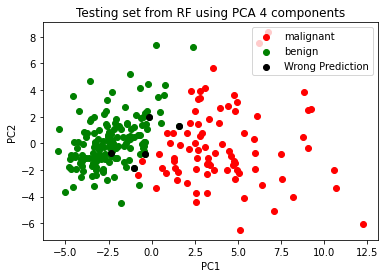

In [23]:
import matplotlib.pyplot as plt

ax = plt.gca()

targets = np.unique(y_pred_KNN)
colors = ['r', 'g']

for target, color in zip(targets,colors):
    indp = y_pred_KNN == target
    ax.scatter(X_test_pca.loc[indp, 'PC1'], X_test_pca.loc[indp, 'PC2'],c = color)

# Ploting the Wrong Prediction
ind = y_pred_KNN!=np.array(y_test)
ax.scatter(X_test_pca.loc[ind, 'PC1'],X_test_pca.loc[ind, 'PC2'],c = 'black')

#axis control
ax.legend(['malignant','benign','Wrong Prediction'])  
ax.set_title("Testing set from RF using PCA 4 components")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

plt.show()


As seen, there are 5 points that were wrongly identified

# 8 Neural Network

## 8.1 The Neural Network of a brain

- Neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates.
- Neuron is a basic unit in a nervous system and is the most important component of the brain.
- In each Neuron, there is a cell body (node), dendrite (input signal) and axon (output signal to other neuron).
- If a Neuron received enough signal, it is then activated to decide whether or not it should transmitt the signal to other neuron or not.

![image](https://user-images.githubusercontent.com/43855029/114472746-da188c00-9bc0-11eb-913c-9dcd14f872ac.png)

## 8.2 Neural Network terminology in Machine Learning 

![image](https://user-images.githubusercontent.com/43855029/114472756-dd137c80-9bc0-11eb-863d-7c4d054efa89.png)

## 8.3 Formulation of Neural Network

![image](https://user-images.githubusercontent.com/43855029/114472776-e997d500-9bc0-11eb-9f70-450389c912df.png)

*Here*:

- x1,x2....xn are input variables.
- w1,w2....wn are weights of respective inputs.
- b is the bias, which is summed with the weighted inputs to form the net inputs.
In which:

- Bias and weights are both adjustable parameters of the neuron.
- Parameters are adjusted using some learning rules.
- The output of a neuron can range from -inf to +inf. As the neuron doesn’t know the boundary, so we need a mapping mechanism between the input and output of the neuron. This mechanism of mapping inputs to output is known as Activation Function.

#### Activation function

![image](https://user-images.githubusercontent.com/43855029/114575672-6752f380-9c48-11eb-8d53-c78d052cdf17.png)

## 8.4 Multi-layer Perceptron

**Multi-layer Perceptron (MLP)** is a supervised learning algorithm. Given a set of features X = x1, x2, ... xm, and target y, MLP can learn a non-linear function approximator for either classification or regression.

Between the input and the output layer, there can be one or more non-linear layers, called hidden layers. Figure below shows a one hidden layer MLP with scalar output.

![image](https://user-images.githubusercontent.com/43855029/114472972-51e6b680-9bc1-11eb-9e78-90ec739844ee.png)

![image](https://user-images.githubusercontent.com/43855029/114575549-48546180-9c48-11eb-8c9c-c5eac3180df1.png)

#### The advantages of Multi-layer Perceptron:

- Capability to learn non-linear models.
- Capability to learn models in real-time (on-line learning) using partial_fit.

#### The disadvantages of Multi-layer Perceptron:

- MLP with hidden layers have a non-convex loss function where there exists more than one local minimum. Therefore different random weight initializations can lead to different validation accuracy.
- MLP requires tuning a number of hyperparameters such as the number of hidden neurons, layers, and iterations.
- MLP is sensitive to feature scaling.

## 8.5 Type of Neural Network Multi-Layer Perceptron in sklearn
Similar to previous Machine Learning model, there are 2 main types of MLP in sklearn, depending on the model output:

- **MLPClassifier**: for Classification problem
- **MLPRegressor**: for Regression problem

## 8.6 Implementation with Classification problem

Here we continue using **Breast Cancer Wisconsine** data for **Classification** problem

#### Import data and split into training/testing

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



The Class **MLPClassifier** implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation.
There are lots of parameters in MLPClassifier:
- **hidden_layer_sizes** which is the number of hidden layers and neurons for each layer. Default=`(100,)`
for example `hidden_layer_sizes=(100,)` means there is 1 hidden layers used, with 100 neurons.
for example `hidden_layer_sizes=(50,20)` means there are 2 hidden layers used, the first layer has 50 neuron and the second has 20 neurons.
- **solver** `lbfgs, sgd, adam`. Default=`adam`
- **activation** `identity, logistic, tanh, relu`. Default='relu`

More information can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)


In [25]:
from sklearn.neural_network import MLPClassifier
model_NN = MLPClassifier(hidden_layer_sizes = (50,20),solver='lbfgs',activation='relu',random_state=123).fit(X_train_scaled, y_train)
model_NN.score(X_test_scaled,y_test)

0.9780701754385965

## 8.7 Implementation with Regression problem
- Class **MLPRegressor** implements a multi-layer perceptron (MLP) that trains using backpropagation with no activation function in the output layer, which can also be seen as using the identity function as activation function. 
- Therefore, it uses the square error as the loss function, and the output is a set of continuous values.

Here we use **california housing** data from Regression espisode:


In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

# Predictors/Input:
X = pd.DataFrame(data.data,columns=data.feature_names)

# Predictand/output:
y = pd.DataFrame(data.target,columns=data.target_names)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.6,random_state=123)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Fit **MLPRegressor** model

In [27]:
from sklearn.neural_network import MLPRegressor
model_NN = MLPRegressor(hidden_layer_sizes = (10,5),solver='lbfgs',activation='tanh',max_iter=1000).fit(X_train_scaled,y_train)
model_NN.score(X_test_scaled,y_test)

/users/tuev/.conda/envs/ML_SKLN/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/users/tuev/.conda/envs/ML_SKLN/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.7275509258974092

In [28]:
from sklearn import metrics
y_pred = model_NN.predict(X_test_scaled)
metrics.r2_score(y_test,y_pred)

0.7275509258974092


## 8.8 Tips on using MLP
- Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale your data. 
- Empirically, we observed that **L-BFGS** converges faster and with better solutions on small datasets. For relatively large datasets, however, **Adam** is very robust. It usually converges quickly and gives pretty good performance. **SGD** with momentum or nesterov’s momentum, on the other hand, can perform better than those two algorithms if learning rate is correctly tuned.
- Since backpropagation has a high time complexity, it is advisable to start with smaller number of hidden neurons and few hidden layers for training.
- The loss function for Classifier is **Cross-Entropy** while for Regression is **Square-Error**

## 8.9. Notes
- There are many other NN algorithms which will be introduced in the Deep Learning class


# 9 Unsupervised Learning

- No labels are given to the learning algorithm leaving it on its own to find structure in its input. 
- Unsupervised learning can be a goal in itself (discovering hidden patterns in data) or a means towards an end (feature learning).
- Used when no feature output data
- Often used for clustering data

![image](https://user-images.githubusercontent.com/43855029/114584282-82c1fc80-9c50-11eb-9342-41e5592e7b67.png) 

![image](https://user-images.githubusercontent.com/43855029/114584314-89507400-9c50-11eb-9c54-5a589075fd48.png)

**Typical method:**

```
K-means clustering
Hierarchical clustering
Ward clustering
Partition Around Median (PAM)
```

## 9.1 K-means clustering
### 9.1.1 Explanation of K-means clustering method:
- Given a set of data, we choose K=2 clusters to be splited:

![image](https://user-images.githubusercontent.com/43855029/114584415-a5ecac00-9c50-11eb-8919-807f83ddf23a.png)

- First select 2 random centroids (denoted as red and blue X)

![image](https://user-images.githubusercontent.com/43855029/114584573-d16f9680-9c50-11eb-9dc4-8d918919f565.png)

- Compute the distance between 2 centroid red X and blue X with all the points (for instance using Euclidean distance) and compare with each other. 2 groups are created with shorter distance to 2 centroids

![image](https://user-images.githubusercontent.com/43855029/114584860-0bd93380-9c51-11eb-9afc-3bb9510e9c34.png)

- Now recompute the **new** centroids of the 2 groups (using mean value of all points in the same groups):

![image](https://user-images.githubusercontent.com/43855029/114585002-34f9c400-9c51-11eb-83e0-b5769abf6cd3.png)

- Compute the distance between 2 **new** centroids and all the points. We have 2 new groups:

![image](https://user-images.githubusercontent.com/43855029/114585030-3b883b80-9c51-11eb-8f69-29f6e406e215.png)

- Repeat the last 2 steps until **no more new centroids** created. The model reach equilibrium:

![image](https://user-images.githubusercontent.com/43855029/114585223-6b374380-9c51-11eb-8663-27474956ec61.png)

### 9.1.2 Example with K=3
![image](https://user-images.githubusercontent.com/43855029/114585361-8e61f300-9c51-11eb-965e-dc4d57e9c0eb.png)

![image](https://user-images.githubusercontent.com/43855029/114585502-b81b1a00-9c51-11eb-8015-973216b450ce.png)

### 9.1.3. Implementation
Here we use the iris data set with only predictors

In [29]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
iris = load_iris()
X = iris.data
#No y=iris.target

Apply Kmeans clustering and plotting


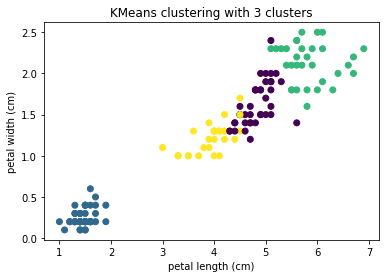

In [32]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

model_KMeans = KMeans(n_clusters=4)
model_KMeans.fit(X)

plt.scatter(X[:,2],X[:,3],c=model_KMeans.labels_)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.title('KMeans clustering with 3 clusters')
plt.show()


### 9.1.4 How to find optimal K values:
#### 9.1.4.1 Elbow approach
- Similar to KNN method for supervised learning, for K-means approach, we are able to use Elbow approach to find the optimal K values.
- The Elbow approach ues the Within-Cluster Sum of Square (WSS) to measure the compactness of the clusters:
![image](https://user-images.githubusercontent.com/43855029/114587068-4d6ade00-9c53-11eb-932d-0de0c9edef83.png)

The optimal K-values can be found from the Elbow using **method="wss"**:

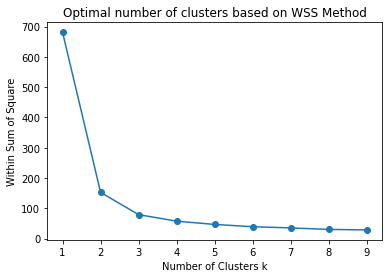

In [33]:
wss = []
for k in range(1,10):
    model = KMeans(n_clusters=k).fit(X)
    wss.append(model.inertia_)
    
plt.scatter(range(1,10),wss)
plt.plot(range(1,10),wss)
plt.xlabel("Number of Clusters k")
plt.ylabel("Within Sum of Square")
plt.title("Optimal number of clusters based on WSS Method")
plt.show()

#### 9.1.4.2 Gap-Statistics approach
- Developed by Prof. Tibshirani et al in Stanford
- Applied to any clustering method (K-means, Hierarchical)
- Maximize the Gap function:

![image](https://user-images.githubusercontent.com/43855029/114586376-95d5cc00-9c52-11eb-9b71-ed330cfc50bc.png)

E*n: expectation under a sample size of n from the reference distribution
![image](https://user-images.githubusercontent.com/43855029/114586396-9b331680-9c52-11eb-9b83-955aa256e623.png)

![image](https://user-images.githubusercontent.com/43855029/114586456-af771380-9c52-11eb-9fdb-99cc8df854fb.png)

**Installation:**

This version of Gap Statistics is not official. Until the moment of writing this documentation, no official Gap Statistics has been released in Python.
We use the version from [milesgranger's github](https://github.com/milesgranger/gap_statistic)

In [ ]:
# pip install git+git://github.com/milesgranger/gap_statistic.git
# pip install gapstat-rs


In [42]:
from gap_statistic import OptimalK

optimalK = OptimalK(n_jobs=1) # No parallel
n_clusters = optimalK(X[:,1:4], cluster_array=np.arange(1, 15))
print('Optimal clusters: ', n_clusters)

Optimal clusters:  12


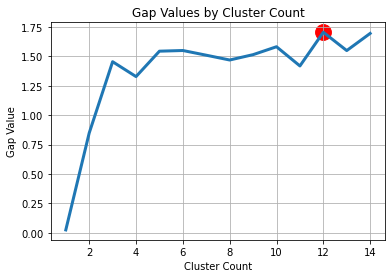

In [43]:
import matplotlib.pyplot as plt
plt.plot(optimalK.gap_df.n_clusters, optimalK.gap_df.gap_value, linewidth=3)
plt.scatter(optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].n_clusters,
            optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].gap_value, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()

## 9.2 Comparison between different clustering methods in sklearn:
- This is example from [sklearn](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html)
- The source code for image below can be found [here](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-download-auto-examples-cluster-plot-cluster-comparison-py)

![image](https://user-images.githubusercontent.com/43855029/115748324-0f14a380-a364-11eb-8a06-6d073b4d99c4.png)


<details><summary>Click here for the source code sample</summary>

```python
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 10,
    "n_clusters": 3,
    "min_samples": 20,
    "xi": 0.05,
    "min_cluster_size": 0.1,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 20,
            "xi": 0.25,
        },
    ),
    (noisy_moons, {"damping": 0.75, "preference": -220, "n_clusters": 2}),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 5,
            "xi": 0.035,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 20,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params["n_clusters"])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="ward", connectivity=connectivity
    )
    spectral = cluster.SpectralClustering(
        n_clusters=params["n_clusters"],
        eigen_solver="arpack",
        affinity="nearest_neighbors",
    )
    dbscan = cluster.DBSCAN(eps=params["eps"])
    optics = cluster.OPTICS(
        min_samples=params["min_samples"],
        xi=params["xi"],
        min_cluster_size=params["min_cluster_size"],
    )
    affinity_propagation = cluster.AffinityPropagation(
        damping=params["damping"], preference=params["preference"], random_state=0
    )
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average",
        affinity="cityblock",
        n_clusters=params["n_clusters"],
        connectivity=connectivity,
    )
    birch = cluster.Birch(n_clusters=params["n_clusters"])
    gmm = mixture.GaussianMixture(
        n_components=params["n_clusters"], covariance_type="full"
    )

    clustering_algorithms = (
        ("MiniBatch\nKMeans", two_means),
        ("Affinity\nPropagation", affinity_propagation),
        ("MeanShift", ms),
        ("Spectral\nClustering", spectral),
        ("Ward", ward),
        ("Agglomerative\nClustering", average_linkage),
        ("DBSCAN", dbscan),
        ("OPTICS", optics),
        ("BIRCH", birch),
        ("Gaussian\nMixture", gmm),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding"
                + " may not work as expected.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()

```

</details>

In [ ]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 10,
    "n_clusters": 3,
    "min_samples": 20,
    "xi": 0.05,
    "min_cluster_size": 0.1,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 20,
            "xi": 0.25,
        },
    ),
    (noisy_moons, {"damping": 0.75, "preference": -220, "n_clusters": 2}),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 5,
            "xi": 0.035,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 20,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params["n_clusters"])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="ward", connectivity=connectivity
    )
    spectral = cluster.SpectralClustering(
        n_clusters=params["n_clusters"],
        eigen_solver="arpack",
        affinity="nearest_neighbors",
    )
    dbscan = cluster.DBSCAN(eps=params["eps"])
    optics = cluster.OPTICS(
        min_samples=params["min_samples"],
        xi=params["xi"],
        min_cluster_size=params["min_cluster_size"],
    )
    affinity_propagation = cluster.AffinityPropagation(
        damping=params["damping"], preference=params["preference"], random_state=0
    )
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average",
        affinity="cityblock",
        n_clusters=params["n_clusters"],
        connectivity=connectivity,
    )
    birch = cluster.Birch(n_clusters=params["n_clusters"])
    gmm = mixture.GaussianMixture(
        n_components=params["n_clusters"], covariance_type="full"
    )

    clustering_algorithms = (
        ("MiniBatch\nKMeans", two_means),
        ("Affinity\nPropagation", affinity_propagation),
        ("MeanShift", ms),
        ("Spectral\nClustering", spectral),
        ("Ward", ward),
        ("Agglomerative\nClustering", average_linkage),
        ("DBSCAN", dbscan),
        ("OPTICS", optics),
        ("BIRCH", birch),
        ("Gaussian\nMixture", gmm),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding"
                + " may not work as expected.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()

In [ ]:
Color = ['Red','Red','Yellow','Green','Yellow']
Color_OHE = pd.get_dummies(Color,drop_first=False)

In [ ]:
Color_OHE

In [ ]:
Color_OHE = pd.get_dummies(Color,drop_first=True)

In [ ]:
Color_OHE